In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

from datafiles import (
    Datafile_VeigaLopez_Mother, Datafile_VeigaLopez_Fetus,
    Datafile_Corbel_Mother_BPA_ngml, Datafile_Corbel_Mother_BPAG_ngml,
    Datafile_Corbel_Fetus_BPA_ngml, Datafile_Corbel_Fetus_BPAG_ngml,
)

from experiments import (
    VeigaLopezExperiment,
    CorbelExperiment_Mother_BPA, CorbelExperiment_Mother_BPAG,
    CorbelExperiment_Fetus_BPA, CorbelExperiment_Fetus_BPAG,
    MultiSCExperiment,
)

In [24]:
def plot_subgraph(ax, exp_no, df_no, var_no, y_label, color, ls, lw=None, exp_variable=None, show_obs=True, ylim=None, label=None, params=None):
    experiment, datafiles = calibration_experiments[exp_no]

    if params is not None:
        params = {**param_values, **params}
    else:
        params = param_values.copy()
    sim = experiment.run(params=params)
    
    df = datafiles[df_no]
    variable = df.variables[var_no]
    if exp_variable is None:
        exp_variable = df.inv_mapping[variable]

    x_sim = sim['time']
    y_sim = sim[exp_variable]
    x_obs = df.df['time']
    y_obs = df.df[variable]
    y_obs_err = df.df[variable +'_Sd']
    
    plt.rc('font', family='serif')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )


    
    ax.plot(sim['time'], sim[exp_variable], color=color, ls=ls, lw=lw, label=label)
        
    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=17)
    ax.set_xlabel('Time [h]', fontsize=17)
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim([-(max(y_obs) + max(y_obs_err))*0.05, (max(y_obs) + max(y_obs_err))*1.05])

        
    # plot observations
    if show_obs:
        ax.errorbar(df.df['time'], df.df[variable], df.df[variable +'_Sd'], color='k', fmt='d', capsize=4, fillstyle='none',  markersize=9)

    if label is not None:
        ax.legend(prop={'size': 16})

def multidosing_means(df, variable):
    means = []
    for day in range(1, 15):
        means.append(df[variable][(df['time']>(day-1)*24) & (df['time']<(day)*24)].mean())
    x = np.linspace(0, 14, num=14, endpoint=True)
    f = interp1d(x, means)
    return f
    
    
def multidosing_plot(sim_multi, sim_single, variable, color, ls, y_label=None, y_lim=None, plot_single=False, means=None, lw=None):
    plt.plot(sim_multi['time']/24, sim_multi[variable], color=color, ls=ls, lw=lw)
    if plot_single:
        plt.plot(sim_single['time']/24, sim_single[variable], color=color, ls='dashed', lw=lw)
    
    if means is not None:
        plt.plot(np.linspace(0,14, num=100, endpoint=True), means(np.linspace(0,14, num=100, endpoint=True)), color='black', lw=lw)
        
    
    if y_label is not None:
        plt.ylabel(y_label, fontsize=17)
    plt.xlabel('Time [d]', fontsize=17)
    if y_lim is not None:
        plt.ylim(y_lim)

In [12]:
calibration_experiments = [
(
    VeigaLopezExperiment(start=0, end=74, steps=2001), 
    [Datafile_VeigaLopez_Mother(), Datafile_VeigaLopez_Fetus()]
),
(
    CorbelExperiment_Mother_BPA(),
    [Datafile_Corbel_Mother_BPA_ngml(drop=['fBPA_C', 'fBPAG_C'])]
),
(
    CorbelExperiment_Mother_BPAG(),
    [Datafile_Corbel_Mother_BPAG_ngml()]
),

(
    CorbelExperiment_Fetus_BPA(),
    [Datafile_Corbel_Fetus_BPA_ngml()]
),
(
    CorbelExperiment_Fetus_BPAG(),
    [Datafile_Corbel_Fetus_BPAG_ngml()]
),
]

In [13]:
param_values = {
    'FSC': 0.12925068935618364,
    'K_blood_plasma_mBPA': 1.0,
    'K_blood_plasma_mBPAconj': 1.0,
    'Ka1': 0.20403169947338545,
    'Kd_fBPAconj': 1.4141726874272238,
    'Kel_blood_mBPA': 0.0347793056743424,
    'Kel_blood_mBPAconj': 0.3754462987856387,
    'Kel_liver_mBPAconj': 2.0523111250582877,
    'Km_mg_L_fBPA': 6.854826868649713,
    'Km_mg_L_mBPA': 3.4569542913708466,
    'Kt': 0.0,
    'PF_mBPA': 1.16,
    'PF_mBPAconj': 0.22,
    'PK_mBPA': 0.858,
    'PK_mBPAconj': 3.18,
    'PL_mBPA': 4.349534587484514,
    'PL_mBPAconj': 6.76,
    'PPL_mBPA': 0.88,
    'PPL_mBPAconj': 0.68,
    'PR_fBPA': 0.005824143067059321,
    'PR_fBPAconj': 0.5004531476412513,
    'PR_mBPA': 0.04401584485681505,
    'PR_mBPAconj': 0.1540034046103612,
    'Vmax_mg_h_kg_fBPA': 4312.043125644694,
    'Vmax_mg_h_kg_mBPA': 3458.3992133717543,
    'k1t': 6.733029056097136,
    'k2t': 5.412086249744513,
}

In [14]:
plt.rc('font', family='serif')

# Figure 2

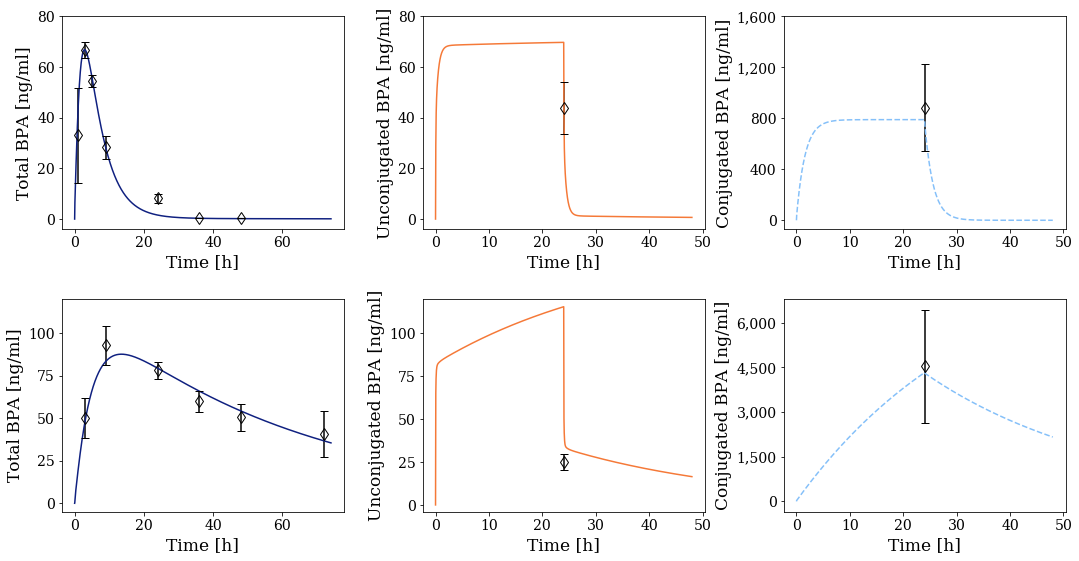

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))


plot_subgraph(ax1, 0, 0, 0, 'Total BPA [ng/ml]', '#0f2080', 'solid', ylim=[-4, 80])
plot_subgraph(ax2, 1, 0, 0, 'Unconjugated BPA [ng/ml]', color='#f57938', ls='solid',  ylim=[-4, 80])
plot_subgraph(ax3, 2, 0, 0, 'Conjugated BPA [ng/ml]', color='#85c0F9', ls='dashed', ylim=[-70, 1600])

plot_subgraph(ax4, 0, 1, 0, 'Total BPA [ng/ml]', '#0f2080', 'solid', ylim=[-5,120])
plot_subgraph(ax5, 3, 0, 2, 'Unconjugated BPA [ng/ml]', color='#f57938', ls='solid', ylim=[-4,120])
plot_subgraph(ax6, 4, 0, 0, 'Conjugated BPA [ng/ml]', color='#85c0F9', ls='dashed', ylim=[-350, 6800])

fig.tight_layout()
fig.savefig('../figures/FIG_2_bpa_calibration_ngml.svg', format='svg', dpi=1200)
plt.show()

# Supplemental Figure 1

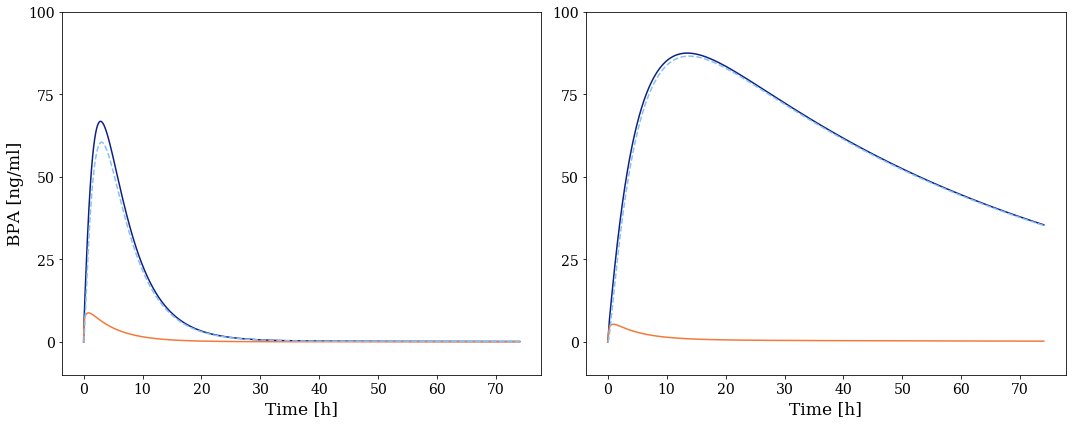

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')



plot_subgraph(ax1, 0, 0, 0, 'BPA [ng/ml]', '#0f2080', 'solid', show_obs=False, ylim=[-10, 100])
plot_subgraph(ax1, 0, 0, 0, None, exp_variable='CA_plasma_ngml_mBPA', color='#f57938', ls='solid', show_obs=False,ylim=[-10, 100])
plot_subgraph(ax1, 0, 0, 0, None, exp_variable='CA_plasma_ngml_mBPAconj', color='#85c0F9', ls='dashed', show_obs=False,ylim=[-10, 100])

plot_subgraph(ax2, 0, 1, 0, None, '#0f2080', 'solid', show_obs=False, ylim=[-10, 100])
plot_subgraph(ax2, 0, 1, 0, None, exp_variable='CA_plasma_ngml_fBPA', color='#f57938', ls='solid', show_obs=False, ylim=[-10, 100])
plot_subgraph(ax2, 0, 1, 0, None, exp_variable='CA_plasma_ngml_fBPAconj', color='#85c0F9', ls='dashed', show_obs=False, ylim=[-10, 100])


fig.tight_layout()
fig.savefig('../figures/FIG_S1_bpa_mother_fetus_breakdown_ngml.svg', format='svg', dpi=1200)    
plt.show()

# Supplemental Figure 1 - thicker lines

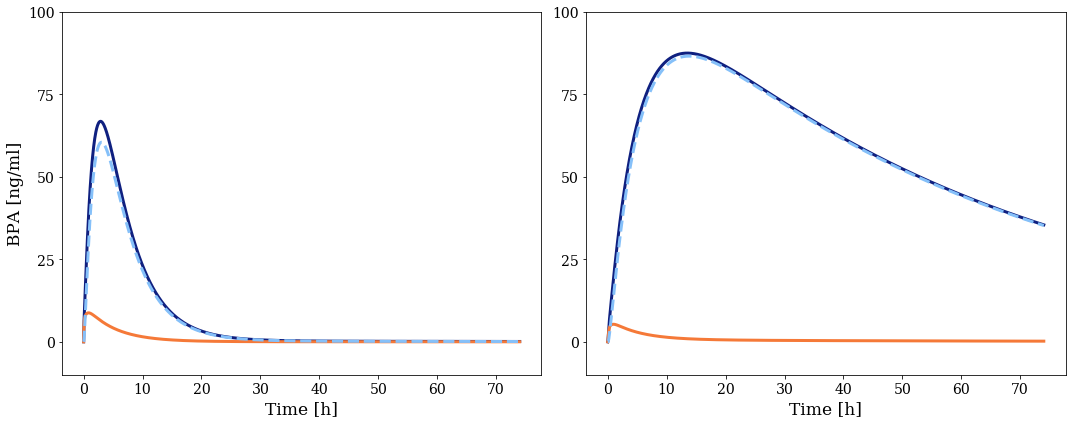

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')



plot_subgraph(ax1, 0, 0, 0, 'BPA [ng/ml]', '#0f2080', 'solid', show_obs=False, ylim=[-10, 100], lw=3)
plot_subgraph(ax1, 0, 0, 0, None, exp_variable='CA_plasma_ngml_mBPA', color='#f57938', ls='solid', show_obs=False, ylim=[-10, 100], lw=3)
plot_subgraph(ax1, 0, 0, 0, None, exp_variable='CA_plasma_ngml_mBPAconj', color='#85c0F9', ls='dashed', show_obs=False, ylim=[-10, 100], lw=3)

plot_subgraph(ax2, 0, 1, 0, None, '#0f2080', 'solid', show_obs=False, ylim=[-10, 100], lw=3)
plot_subgraph(ax2, 0, 1, 0, None, exp_variable='CA_plasma_ngml_fBPA', color='#f57938', ls='solid', show_obs=False, ylim=[-10, 100], lw=3)
plot_subgraph(ax2, 0, 1, 0, None, exp_variable='CA_plasma_ngml_fBPAconj', color='#85c0F9', ls='dashed', show_obs=False, ylim=[-10, 100], lw=3)


fig.tight_layout()
fig.savefig('../figures/FIG_S1-thicker_bpa_mother_fetus_breakdown_ngml.svg', format='svg', dpi=1200)    
plt.show()

# Figure 4 - initialization

In [37]:
experiment = MultiSCExperiment(end=336)

param_values['IS_MULTI'] = 0
param_values['PSCDOSE_mBPA'] = 50e-6
sim_single = experiment.run(params=param_values)
param_values['IS_MULTI'] = 1
sim_multi = experiment.run(params=param_values)
param_values['IS_MULTI'] = 0
param_values['PSCDOSE_mBPA'] = 0


df = pd.DataFrame(sim_multi, columns=sim_multi.colnames)

# Figure 4A

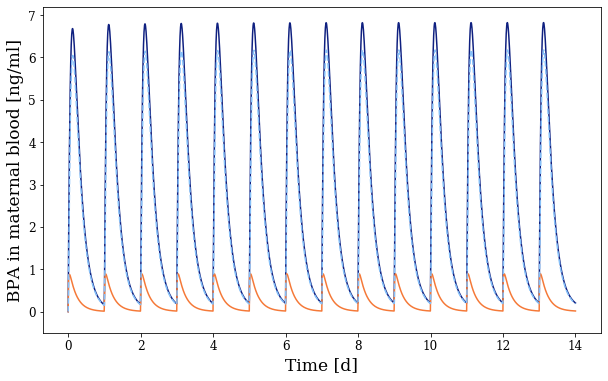

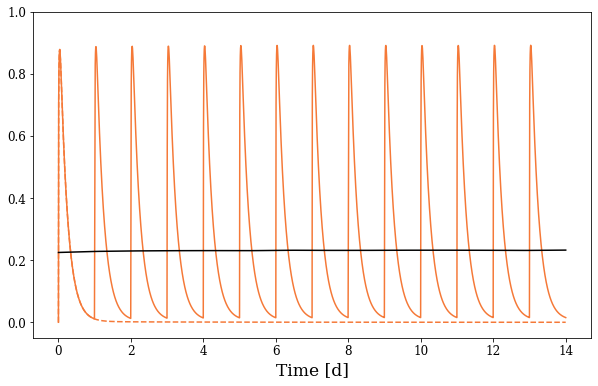

In [38]:
plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPAtotal', 
    color='#0f2080', ls='solid', 
    y_label='BPA in maternal blood [ng/ml]', 
    y_lim=[-0.5, 7.2],
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPA', 
    color='#f57938', ls='solid',
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPAconj', 
    color='#85c0F9', ls='dashed', 
)
plt.savefig('../figures/FIG_4_A_1_bpa_maternal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPA', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CA_plasma_ngml_mBPA'),
    y_lim=[-0.05, 1],
)
plt.savefig('../figures/FIG_4_A_2_bpa_only_maternal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 4B

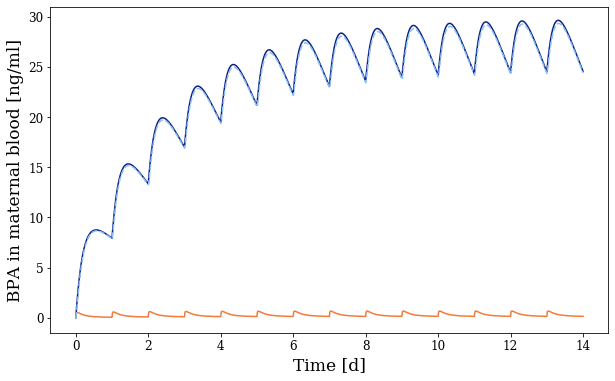

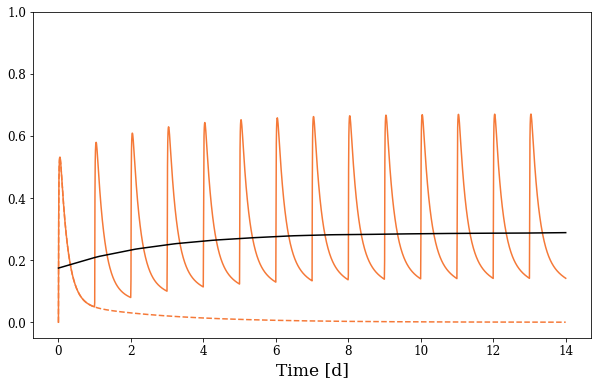

In [39]:
plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPAtotal', 
    color='#0f2080', ls='solid', 
    y_label='BPA in maternal blood [ng/ml]', 
    y_lim=[-1.5, 31],
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPA', 
    color='#f57938', ls='solid',
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPAconj', 
    color='#85c0F9', ls='dashed', 
)
plt.savefig('../figures/FIG_4_B_1_bpa_fetal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPA', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CA_plasma_ngml_fBPA'),
    y_lim=[-0.05, 1],
)
plt.savefig('../figures/FIG_4_B_2_bpa_only_fetal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 4A - thicker

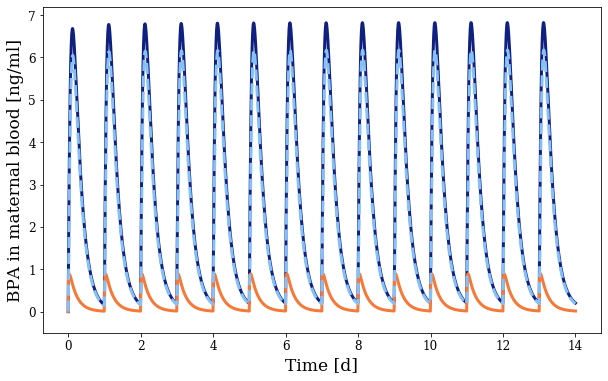

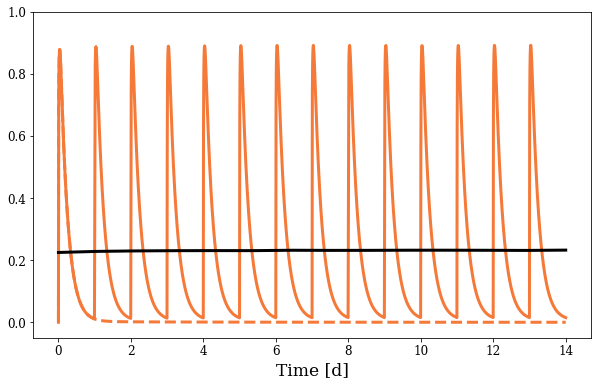

In [40]:
plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPAtotal', 
    color='#0f2080', ls='solid', 
    y_label='BPA in maternal blood [ng/ml]', 
    y_lim=[-0.5, 7.2],
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPA', 
    color='#f57938', ls='solid',
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPAconj', 
    color='#85c0F9', ls='dashed', 
    lw=3,
)
plt.savefig('../figures/FIG_4_A_1-thicker_bpa_maternal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_mBPA', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CA_plasma_ngml_mBPA'),
    y_lim=[-0.05, 1],
    lw=3,
)
plt.savefig('../figures/FIG_4_A_2-thicker_bpa_only_maternal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 4B - thicker

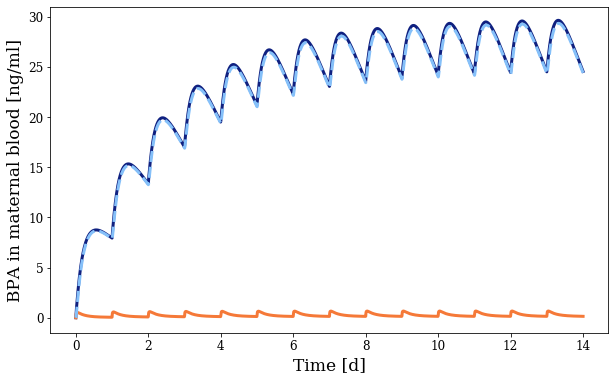

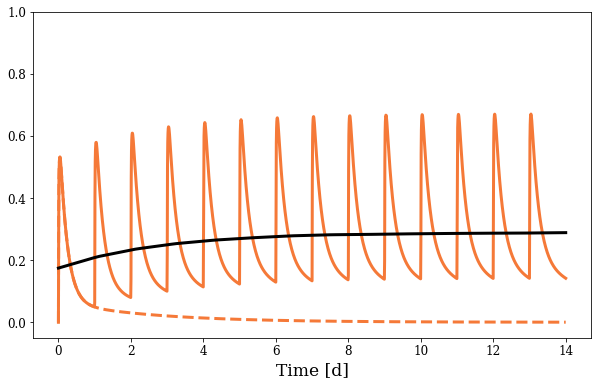

In [41]:
plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPAtotal', 
    color='#0f2080', ls='solid', 
    y_label='BPA in maternal blood [ng/ml]', 
    y_lim=[-1.5, 31],
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPA', 
    color='#f57938', ls='solid',
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPAconj', 
    color='#85c0F9', ls='dashed', 
    lw=3,
)
plt.savefig('../figures/FIG_4_B_1-thicker_bpa_fetal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_plasma_ngml_fBPA', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CA_plasma_ngml_fBPA'),
    y_lim=[-0.05, 1],
    lw=3,
)
plt.savefig('../figures/FIG_4_B_2-thicker_bpa_only_fetal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()